<a href="https://colab.research.google.com/github/asadstat/Data_analysis/blob/master/All_Deep_Learning_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import keras
from keras import initializers, regularizers, constraints, optimizers, layers, callbacks
from keras.preprocessing import text, sequence
from keras.layers import Dense,Input,LSTM,Bidirectional,Activation,Conv1D,GRU
from keras.layers import Dropout,Embedding,GlobalMaxPooling1D, MaxPooling1D, Add, Flatten
from keras.layers import GlobalAveragePooling1D, GlobalMaxPooling1D, concatenate, SpatialDropout1D
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.models import Model
from tensorflow.keras.optimizers import Adam
#from keras.optimizers import Adam
from keras.callbacks import Callback
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
print(keras.__version__)

2.7.0


In [ ]:
import numpy as np
import pandas as pd
import re
import nltk
import spacy
import string
pd.options.mode.chained_assignment = None

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
full_df = pd.read_csv("/content/drive/MyDrive/data/sentiment.csv",usecols=['title','Sentiment'], nrows=5000)
df = full_df[["title",'Sentiment']]
df["text1"] = df["title"].astype(str)
full_df.head()

,title,Sentiment
0,Three Industrial Giants You Should Own In 2020,Positive
1,Labor Stocks Are Going To Break Out In 2020,Positive
2,"Tesla (TSLA) Breaks Shipment Record, Beats Est...",Positive
3,"On the road to AI adoption, execs grapple with...",Positive
4,Red Carpet Sustainability After Coronavirus Sh...,Positive


In [ ]:
df.head()

,title,Sentiment,text1
0,Three Industrial Giants You Should Own In 2020,Positive,Three Industrial Giants You Should Own In 2020
1,Labor Stocks Are Going To Break Out In 2020,Positive,Labor Stocks Are Going To Break Out In 2020
2,"Tesla (TSLA) Breaks Shipment Record, Beats Est...",Positive,"Tesla (TSLA) Breaks Shipment Record, Beats Est..."
3,"On the road to AI adoption, execs grapple with...",Positive,"On the road to AI adoption, execs grapple with..."
4,Red Carpet Sustainability After Coronavirus Sh...,Positive,Red Carpet Sustainability After Coronavirus Sh...


In [ ]:
df["text_lower"] = df["text1"].str.lower()
df.head()


,title,Sentiment,text1,text_lower
0,Three Industrial Giants You Should Own In 2020,Positive,Three Industrial Giants You Should Own In 2020,three industrial giants you should own in 2020
1,Labor Stocks Are Going To Break Out In 2020,Positive,Labor Stocks Are Going To Break Out In 2020,labor stocks are going to break out in 2020
2,"Tesla (TSLA) Breaks Shipment Record, Beats Est...",Positive,"Tesla (TSLA) Breaks Shipment Record, Beats Est...","tesla (tsla) breaks shipment record, beats est..."
3,"On the road to AI adoption, execs grapple with...",Positive,"On the road to AI adoption, execs grapple with...","on the road to ai adoption, execs grapple with..."
4,Red Carpet Sustainability After Coronavirus Sh...,Positive,Red Carpet Sustainability After Coronavirus Sh...,red carpet sustainability after coronavirus sh...


In [ ]:
df.head()

,title,Sentiment,text1,text_lower
0,Three Industrial Giants You Should Own In 2020,Positive,Three Industrial Giants You Should Own In 2020,three industrial giants you should own in 2020
1,Labor Stocks Are Going To Break Out In 2020,Positive,Labor Stocks Are Going To Break Out In 2020,labor stocks are going to break out in 2020
2,"Tesla (TSLA) Breaks Shipment Record, Beats Est...",Positive,"Tesla (TSLA) Breaks Shipment Record, Beats Est...","tesla (tsla) breaks shipment record, beats est..."
3,"On the road to AI adoption, execs grapple with...",Positive,"On the road to AI adoption, execs grapple with...","on the road to ai adoption, execs grapple with..."
4,Red Carpet Sustainability After Coronavirus Sh...,Positive,Red Carpet Sustainability After Coronavirus Sh...,red carpet sustainability after coronavirus sh...


In [ ]:
df.head()

,title,Sentiment,text1,text_lower
0,Three Industrial Giants You Should Own In 2020,Positive,Three Industrial Giants You Should Own In 2020,three industrial giants you should own in 2020
1,Labor Stocks Are Going To Break Out In 2020,Positive,Labor Stocks Are Going To Break Out In 2020,labor stocks are going to break out in 2020
2,"Tesla (TSLA) Breaks Shipment Record, Beats Est...",Positive,"Tesla (TSLA) Breaks Shipment Record, Beats Est...","tesla (tsla) breaks shipment record, beats est..."
3,"On the road to AI adoption, execs grapple with...",Positive,"On the road to AI adoption, execs grapple with...","on the road to ai adoption, execs grapple with..."
4,Red Carpet Sustainability After Coronavirus Sh...,Positive,Red Carpet Sustainability After Coronavirus Sh...,red carpet sustainability after coronavirus sh...


In [ ]:
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

df["text_punc"] = df["text_lower"].apply(lambda text: remove_punctuation(text))
df.head()

,title,Sentiment,text1,text_lower,text_punc
0,Three Industrial Giants You Should Own In 2020,Positive,Three Industrial Giants You Should Own In 2020,three industrial giants you should own in 2020,three industrial giants you should own in 2020
1,Labor Stocks Are Going To Break Out In 2020,Positive,Labor Stocks Are Going To Break Out In 2020,labor stocks are going to break out in 2020,labor stocks are going to break out in 2020
2,"Tesla (TSLA) Breaks Shipment Record, Beats Est...",Positive,"Tesla (TSLA) Breaks Shipment Record, Beats Est...","tesla (tsla) breaks shipment record, beats est...",tesla tsla breaks shipment record beats estima...
3,"On the road to AI adoption, execs grapple with...",Positive,"On the road to AI adoption, execs grapple with...","on the road to ai adoption, execs grapple with...",on the road to ai adoption execs grapple with ...
4,Red Carpet Sustainability After Coronavirus Sh...,Positive,Red Carpet Sustainability After Coronavirus Sh...,red carpet sustainability after coronavirus sh...,red carpet sustainability after coronavirus sh...


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [ ]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df["text_stop"] = df["text_punc"].apply(lambda text: remove_stopwords(text))
df.head()

,title,Sentiment,text1,text_lower,text_punc,text_stop
0,Three Industrial Giants You Should Own In 2020,Positive,Three Industrial Giants You Should Own In 2020,three industrial giants you should own in 2020,three industrial giants you should own in 2020,three industrial giants 2020
1,Labor Stocks Are Going To Break Out In 2020,Positive,Labor Stocks Are Going To Break Out In 2020,labor stocks are going to break out in 2020,labor stocks are going to break out in 2020,labor stocks going break 2020
2,"Tesla (TSLA) Breaks Shipment Record, Beats Est...",Positive,"Tesla (TSLA) Breaks Shipment Record, Beats Est...","tesla (tsla) breaks shipment record, beats est...",tesla tsla breaks shipment record beats estima...,tesla tsla breaks shipment record beats estima...
3,"On the road to AI adoption, execs grapple with...",Positive,"On the road to AI adoption, execs grapple with...","on the road to ai adoption, execs grapple with...",on the road to ai adoption execs grapple with ...,road ai adoption execs grapple expertise data
4,Red Carpet Sustainability After Coronavirus Sh...,Positive,Red Carpet Sustainability After Coronavirus Sh...,red carpet sustainability after coronavirus sh...,red carpet sustainability after coronavirus sh...,red carpet sustainability coronavirus top prio...


In [ ]:
from nltk.stem.porter import PorterStemmer

In [ ]:
stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

df["text_stemmed"] = df["text_stop"].apply(lambda text: stem_words(text))
df.head()

,title,Sentiment,text1,text_lower,text_punc,text_stop,text_stemmed
0,Three Industrial Giants You Should Own In 2020,Positive,Three Industrial Giants You Should Own In 2020,three industrial giants you should own in 2020,three industrial giants you should own in 2020,three industrial giants 2020,three industri giant 2020
1,Labor Stocks Are Going To Break Out In 2020,Positive,Labor Stocks Are Going To Break Out In 2020,labor stocks are going to break out in 2020,labor stocks are going to break out in 2020,labor stocks going break 2020,labor stock go break 2020
2,"Tesla (TSLA) Breaks Shipment Record, Beats Est...",Positive,"Tesla (TSLA) Breaks Shipment Record, Beats Est...","tesla (tsla) breaks shipment record, beats est...",tesla tsla breaks shipment record beats estima...,tesla tsla breaks shipment record beats estima...,tesla tsla break shipment record beat estim fo...
3,"On the road to AI adoption, execs grapple with...",Positive,"On the road to AI adoption, execs grapple with...","on the road to ai adoption, execs grapple with...",on the road to ai adoption execs grapple with ...,road ai adoption execs grapple expertise data,road ai adopt exec grappl expertis data
4,Red Carpet Sustainability After Coronavirus Sh...,Positive,Red Carpet Sustainability After Coronavirus Sh...,red carpet sustainability after coronavirus sh...,red carpet sustainability after coronavirus sh...,red carpet sustainability coronavirus top prio...,red carpet sustain coronaviru top prioriti


In [ ]:
from nltk.stem import WordNetLemmatizer

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

df["text_lemmatized"] = df["text_stemmed"].apply(lambda text: lemmatize_words(text))
df.head()

,title,Sentiment,text1,text_lower,text_punc,text_stop,text_stemmed,text_lemmatized
0,Three Industrial Giants You Should Own In 2020,Positive,Three Industrial Giants You Should Own In 2020,three industrial giants you should own in 2020,three industrial giants you should own in 2020,three industrial giants 2020,three industri giant 2020,three industri giant 2020
1,Labor Stocks Are Going To Break Out In 2020,Positive,Labor Stocks Are Going To Break Out In 2020,labor stocks are going to break out in 2020,labor stocks are going to break out in 2020,labor stocks going break 2020,labor stock go break 2020,labor stock go break 2020
2,"Tesla (TSLA) Breaks Shipment Record, Beats Est...",Positive,"Tesla (TSLA) Breaks Shipment Record, Beats Est...","tesla (tsla) breaks shipment record, beats est...",tesla tsla breaks shipment record beats estima...,tesla tsla breaks shipment record beats estima...,tesla tsla break shipment record beat estim fo...,tesla tsla break shipment record beat estim fo...
3,"On the road to AI adoption, execs grapple with...",Positive,"On the road to AI adoption, execs grapple with...","on the road to ai adoption, execs grapple with...",on the road to ai adoption execs grapple with ...,road ai adoption execs grapple expertise data,road ai adopt exec grappl expertis data,road ai adopt exec grappl expertis data
4,Red Carpet Sustainability After Coronavirus Sh...,Positive,Red Carpet Sustainability After Coronavirus Sh...,red carpet sustainability after coronavirus sh...,red carpet sustainability after coronavirus sh...,red carpet sustainability coronavirus top prio...,red carpet sustain coronaviru top prioriti,red carpet sustain coronaviru top prioriti


In [ ]:
df['Sentiment']=df['Sentiment'].apply(lambda x: 1 if x=='Positive' else 0)

In [ ]:
#df.to_csv("set.csv")

In [ ]:
#df = pd.read_csv("/content/drive/MyDrive/data/senti.csv")

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [ ]:
print(df)

                                                  title  ...                                    text_lemmatized
0        Three Industrial Giants You Should Own In 2020  ...                          three industri giant 2020
1           Labor Stocks Are Going To Break Out In 2020  ...                          labor stock go break 2020
2     Tesla (TSLA) Breaks Shipment Record, Beats Est...  ...  tesla tsla break shipment record beat estim fo...
3     On the road to AI adoption, execs grapple with...  ...            road ai adopt exec grappl expertis data
4     Red Carpet Sustainability After Coronavirus Sh...  ...         red carpet sustain coronaviru top prioriti
...                                                 ...  ...                                                ...
4995  Japan's JXTG sees profit hit from lower oil pr...  ...  japan jxtg see profit hit lower oil price amid...
4996  Virus outbreak knocks four Asia-bound LNG tank...  ...  viru outbreak knock four asiabound lng tan

In [ ]:
X = df['text_lemmatized']
y = df['Sentiment']

In [ ]:
X.shape,y.shape

((5000,), (5000,))

In [ ]:
#50328 only for glove
#2000001 only for Fasttext
max_features=50328
max_len=100
sequence_input = Input(shape=(max_len, ))
embed_size=300

In [ ]:
tokenizer = text.Tokenizer(num_words = max_features,lower = True)
tokenizer.fit_on_texts(X)
X=tokenizer.texts_to_sequences(X)
X=sequence.pad_sequences(X,maxlen=max_len)

In [ ]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)

In [ ]:
from urllib.request import urlopen
import gzip
file = gzip.open(urlopen('https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.vec.gz'))

In [ ]:
vocab_and_vectors = {}  
for line in file:
  values = line.split()
  word = values[0].decode('utf-8')
  coefs = np.asarray(values[1:], dtype='float32')
  vocab_and_vectors[word] = coefs

In [ ]:
word_index = tokenizer.word_index
len(word_index)

5969

In [ ]:
#prepare embedding matrix
num_words = min(max_features, len(word_index) + 1)
embedding_matrix = np.zeros((num_words, embed_size))
for word, i in word_index.items():
    if i >= max_features:
        continue
    embedding_vector = vocab_and_vectors.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [ ]:
embedding_matrix.shape

(5970, 300)

BILSTM fast text

In [ ]:
# Bi LSTM Implimentation
from tensorflow.keras.layers import Embedding,SpatialDropout1D
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from keras.layers.convolutional import Conv1D  
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
#from keras.optimizers import Adam
from tensorflow.keras import optimizers
from keras.models import Sequential
from keras.layers import Embedding,Bidirectional, Dense,Dropout
from keras.layers import Dense, Activation, Flatten
from keras import layers
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.layers import Dropout

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding,Bidirectional, Dense,Dropout
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.layers import Dropout
kfold = StratifiedKFold(n_splits=5, shuffle=True)
cvscores = []

for train, test in kfold.split(X,y):
    ## Creating model
    model2=Sequential()
    model2.add(Embedding(5970,300,weights=[embedding_matrix],trainable=True ))
    model2.add(SpatialDropout1D(0.4))
    model2.add(Bidirectional(LSTM(128)))
    model2.add(Dropout(0.2))
    model2.add(Dense(2,activation='softmax'))
    # model2.add(Dense(1,activation='relu'))
    adam = optimizers.Adam(lr=0.003, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    model2.compile(loss='sparse_categorical_crossentropy',optimizer=adam,metrics=['accuracy'])
    # Fit the model
    history = model2.fit(X[train], y[train],validation_data=(X_test, y_test),epochs=5,batch_size=32)

In [ ]:
hist_df = pd.DataFrame(history.history)
hist_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.611320,0.658425,0.420718,0.812155
1,0.393344,0.828591,0.292281,0.891713
2,0.203694,0.921271,0.200350,0.932044
3,0.099206,0.965608,0.205530,0.940332
4,0.061333,0.979006,0.265998,0.939227


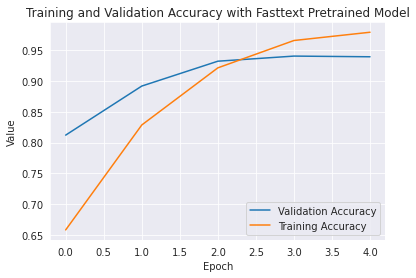

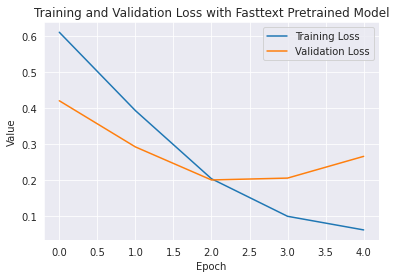

In [ ]:
import matplotlib.pyplot as plt
plt.clf()
plt.plot(hist_df['val_accuracy'], label='Validation Accuracy')
plt.plot(hist_df['accuracy'], label='Training Accuracy')
#plt.axvline(x = 4, linewidth=1, color='r', linestyle = "--")
plt.title('Training and Validation Accuracy with Fasttext Pretrained Model')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()
plt.plot(hist_df['loss'], label='Training Loss')
plt.plot(hist_df['val_loss'], label='Validation Loss')
#plt.axvline(x = 4, linewidth=1, color='r', linestyle = "--")
plt.title('Training and Validation Loss with Fasttext Pretrained Model')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

In [ ]:
predict_X=model2.predict(X_test) 
y_pred=np.argmax(predict_X,axis=1)
#y_pred=model2.predict_classes(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9392265193370166

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94       904
           1       0.93      0.95      0.94       906

    accuracy                           0.94      1810
   macro avg       0.94      0.94      0.94      1810
weighted avg       0.94      0.94      0.94      1810



In [ ]:
y_score = model2.predict(X_test)

In [ ]:
y_score

array([[2.2096848e-01, 7.7903152e-01],
       [7.0908770e-04, 9.9929094e-01],
       [9.0840119e-01, 9.1598824e-02],
       ...,
       [6.8816245e-02, 9.3118376e-01],
       [2.1692044e-03, 9.9783081e-01],
       [3.4960166e-03, 9.9650395e-01]], dtype=float32)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


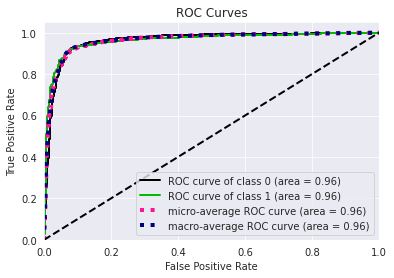

In [ ]:
import scikitplot as skplt
import matplotlib.pyplot as plt
skplt.metrics.plot_roc_curve(y_test, y_score)
plt.show()

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

accuracy:   0.939
Confusion matrix, without normalization


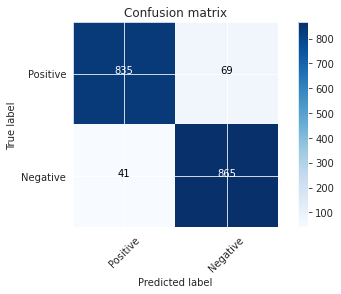

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import metrics
import itertools

score = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['Positive', 'Negative'])

BILSTM

In [ ]:
import pandas as pd
import numpy as np
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import keras
from nltk.tokenize import sent_tokenize
from sklearn import preprocessing
from keras.preprocessing.text import Tokenizer
from keras import initializers, regularizers, constraints, optimizers, layers, callbacks
from keras.preprocessing import text, sequence
from keras.layers import Dense,Input,LSTM,Bidirectional,Activation,Conv1D,GRU
from keras.layers import Dropout,Embedding,GlobalMaxPooling1D, MaxPooling1D, Add, Flatten
from keras.layers import GlobalAveragePooling1D, GlobalMaxPooling1D, concatenate, SpatialDropout1D
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.models import Model
#from keras.optimizers import Adam
from keras.callbacks import Callback
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
print(keras.__version__)

In [ ]:
max_features=30000
max_len=56
sequence_input = Input(shape=(max_len, ))
embed_size=100

In [ ]:
#tokenizer = text.Tokenizer(num_words = max_features,lower = True)
#tokenizer.fit_on_texts(X)
#X=tokenizer.texts_to_sequences(X)
#X=sequence.pad_sequences(X,maxlen=max_len)

In [ ]:
#oversample = SMOTE()
#X, y = oversample.fit_resample(X, y)

In [ ]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)

In [ ]:
# Bi LSTM Implimentation
from tensorflow.keras.layers import Embedding,SpatialDropout1D
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from keras.layers.convolutional import Conv1D  
#from keras.optimizers import SGD
#from keras.optimizers import Adam
from tensorflow.keras import optimizers
from keras.models import Sequential
from keras.layers import Embedding,Bidirectional, Dense,Dropout
from keras.layers import Dense, Activation, Flatten
from keras import layers
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.layers import Dropout
from keras.regularizers import l2
from keras. callbacks import TensorBoard

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding,Bidirectional, Dense,Dropout
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
kfold = StratifiedKFold(n_splits=5, shuffle=True)
cvscores = []
for train, test in kfold.split(X,y):
    model2=Sequential()
    model2.add(Embedding(max_features,100,trainable=True ))
    model2.add(SpatialDropout1D(0.4))
    model2.add(Bidirectional(LSTM(128)))
    model2.add(Dropout(0.4))
    model2.add(Dense(2,activation='softmax'))
    # model2.add(Dense(1,activation='relu'))
    adam = optimizers.Adam(lr=0.003, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    model2.compile(loss='sparse_categorical_crossentropy',optimizer=adam,metrics=['accuracy'])
    # Fit the model
    history = model2.fit(X[train], y[train],validation_data=(X_test, y_test),epochs=5,batch_size=64)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/5
114/114 [==============================] - 64s 524ms/step - loss: 0.6418 - accuracy: 0.6228 - val_loss: 0.4791 - val_accuracy: 0.7862
Epoch 2/5
114/114 [==============================] - 59s 518ms/step - loss: 0.4685 - accuracy: 0.7848 - val_loss: 0.3746 - val_accuracy: 0.8580
Epoch 3/5
114/114 [==============================] - 58s 513ms/step - loss: 0.3363 - accuracy: 0.8605 - val_loss: 0.2821 - val_accuracy: 0.8895
Epoch 4/5
114/114 [==============================] - 58s 513ms/step - loss: 0.2160 - accuracy: 0.9126 - val_loss: 0.2361 - val_accuracy: 0.9160
Epoch 5/5
114/114 [==============================] - 59s 515ms/step - loss: 0.1468 - accuracy: 0.9414 - val_loss: 0.2455 - val_accuracy: 0.9232
Epoch 1/5
114/114 [==============================] - 63s 522ms/step - loss: 0.6464 - accuracy: 0.6191 - val_loss: 0.5054 - val_accuracy: 0.7923
Epoch 2/5
114/114 [==============================] - 59s 518ms/step - loss: 0.4756 - accuracy: 0.7764 - val_loss: 0.3627 - val_accuracy:

In [ ]:
hist_df = pd.DataFrame(history.history)
hist_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.654566,0.611326,0.503279,0.790608
1,0.480410,0.778039,0.368850,0.845856
2,0.442023,0.802210,0.335329,0.856354
3,0.275418,0.891160,0.284644,0.890055
4,0.192937,0.925276,0.247075,0.916575


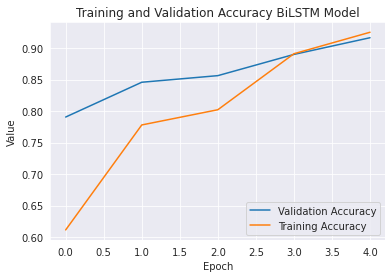

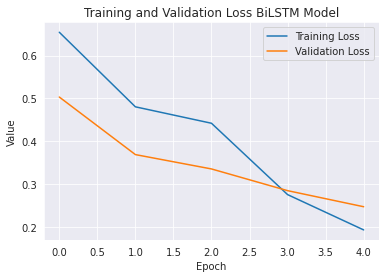

In [ ]:
import matplotlib.pyplot as plt

plt.clf()
plt.plot(hist_df['val_accuracy'], label='Validation Accuracy')
plt.plot(hist_df['accuracy'], label='Training Accuracy')
#plt.axvline(x = 4, linewidth=1, color='r', linestyle = "--")

plt.title('Training and Validation Accuracy BiLSTM Model')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()


plt.plot(hist_df['loss'], label='Training Loss')
plt.plot(hist_df['val_loss'], label='Validation Loss')
#plt.axvline(x = 4, linewidth=1, color='r', linestyle = "--")

plt.title('Training and Validation Loss BiLSTM Model')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

In [ ]:
predict_X=model2.predict(X_test) 
y_pred=np.argmax(predict_X,axis=1)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9165745856353591

In [ ]:
y_score = model2.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


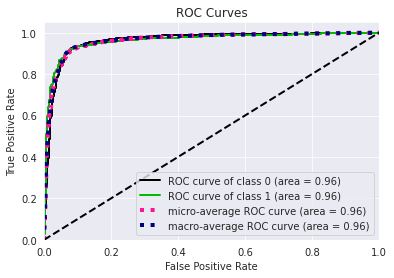

In [ ]:
import scikitplot as skplt
import matplotlib.pyplot as plt
skplt.metrics.plot_roc_curve(y_test, y_score)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92       904
           1       0.90      0.93      0.92       906

    accuracy                           0.92      1810
   macro avg       0.92      0.92      0.92      1810
weighted avg       0.92      0.92      0.92      1810



In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

accuracy:   0.917
Confusion matrix, without normalization


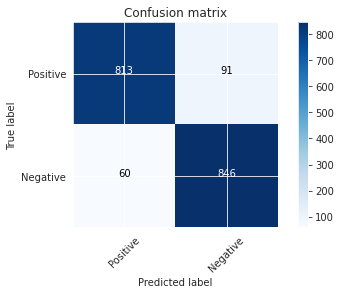

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import metrics
import itertools
score = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['Positive', 'Negative'])

CNN

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,classification_report
import matplotlib.pyplot as plt
from keras.layers import Dense,Input

In [ ]:
#df = pd.read_csv("/content/drive/MyDrive/data/senti.csv")

In [ ]:
#df['text_stemmed'] = df['text_stemmed'].str.lower()

In [ ]:
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Dropout,Activation
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers
import time
from keras import metrics
from tensorflow.keras.preprocessing.text import one_hot

In [ ]:
#from imblearn.over_sampling import SMOTE
#from collections import Counter

In [ ]:
#X = df['text_stemmed']
#y = df['Sentiment']

In [ ]:
#X.shape,y.shape

In [ ]:
max_features=30000
max_len=56
sequence_input = Input(shape=(max_len, ))
embed_size=100

In [ ]:
import keras
from keras import initializers, regularizers, constraints, optimizers, layers, callbacks
from keras.preprocessing import text, sequence

In [ ]:
#tokenizer = text.Tokenizer(num_words = max_features,lower = True)
#tokenizer.fit_on_texts(X)
#X=tokenizer.texts_to_sequences(X)
#X=sequence.pad_sequences(X,maxlen=max_len)

In [ ]:
#oversample = SMOTE()
#X, y = oversample.fit_resample(X, y)

Class=1, n=4525 (50.000%)
Class=0, n=4525 (50.000%)


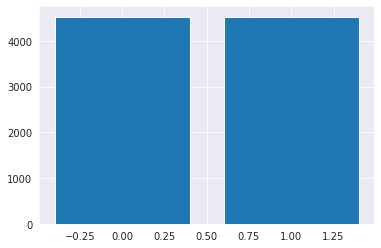

In [ ]:
from matplotlib import pyplot
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [ ]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)

In [ ]:
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Dropout,Activation
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers
import time
from keras import metrics
from tensorflow.keras.preprocessing.text import one_hot

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding,Bidirectional, Dense,Dropout
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.layers import Dropout
kfold = StratifiedKFold(n_splits=5, shuffle=True)

cvscores = []

for train, test in kfold.split(X,y):
      model = Sequential()
      model.add(layers.Embedding(max_features, embed_size, input_length=max_len))
      model.add(layers.Conv1D(128,5, activation='relu'))
      model.add(layers.GlobalMaxPooling1D())
      model.add(layers.Dense(10, activation='relu'))
      model.add(layers.Dense(2, activation='softmax'))
      model.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])
      #model2.add(Dense(1,activation='relu'))
      adam = optimizers.Adam(lr=0.003, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
      model.compile(loss='sparse_categorical_crossentropy',optimizer=adam,metrics=['accuracy'])
      # Fit the model
      history = model.fit(X[train], y[train],validation_data=(X_test, y_test),epochs=5,batch_size=64)

AttributeError: ignored

In [ ]:
hist_df = pd.DataFrame(history.history)
hist_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.654566,0.611326,0.503279,0.790608
1,0.480410,0.778039,0.368850,0.845856
2,0.442023,0.802210,0.335329,0.856354
3,0.275418,0.891160,0.284644,0.890055
4,0.192937,0.925276,0.247075,0.916575


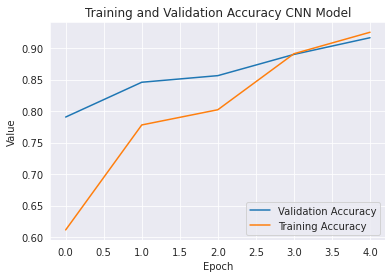

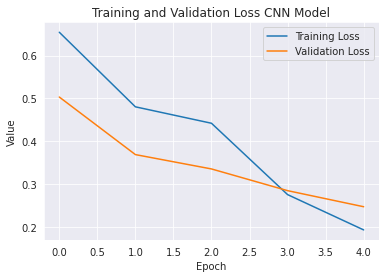

In [ ]:
import matplotlib.pyplot as plt

plt.clf()
plt.plot(hist_df['val_accuracy'], label='Validation Accuracy')
plt.plot(hist_df['accuracy'], label='Training Accuracy')
#plt.axvline(x = 4, linewidth=1, color='r', linestyle = "--")

plt.title('Training and Validation Accuracy CNN Model')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()


plt.plot(hist_df['loss'], label='Training Loss')
plt.plot(hist_df['val_loss'], label='Validation Loss')
#plt.axvline(x = 4, linewidth=1, color='r', linestyle = "--")

plt.title('Training and Validation Loss CNN Model')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

In [ ]:
predict_X=model2.predict(X_test) 
y_pred=np.argmax(predict_X,axis=1)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9165745856353591

In [ ]:
y_score = model.predict(X_test)

In [ ]:
#pip install scikit-plot

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


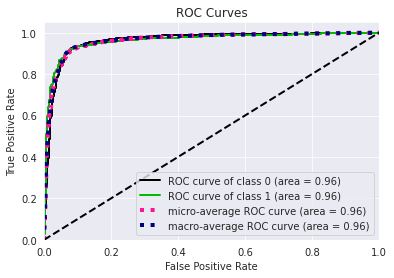

In [ ]:
import scikitplot as skplt
import matplotlib.pyplot as plt
skplt.metrics.plot_roc_curve(y_test, y_score)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92       904
           1       0.90      0.93      0.92       906

    accuracy                           0.92      1810
   macro avg       0.92      0.92      0.92      1810
weighted avg       0.92      0.92      0.92      1810



In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

accuracy:   0.917
Confusion matrix, without normalization


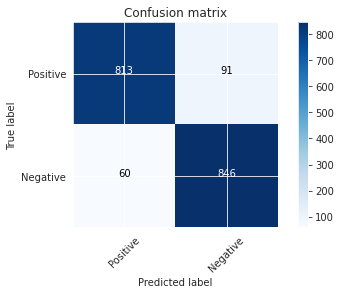

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import metrics
import itertools
score = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['Positive', 'Negative'])

BILSTM with glove

In [ ]:
import pandas as pd
import numpy as np

import os
import re

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

import keras
from keras import initializers, regularizers, constraints, optimizers, layers, callbacks

from keras.preprocessing import text, sequence

from keras.layers import Dense,Input,LSTM,Bidirectional,Activation,Conv1D,GRU
from keras.layers import Dropout,Embedding,GlobalMaxPooling1D, MaxPooling1D, Add, Flatten
from keras.layers import GlobalAveragePooling1D, GlobalMaxPooling1D, concatenate, SpatialDropout1D

from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.models import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from keras.callbacks import Callback

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

print(keras.__version__)

In [ ]:
#df = pd.read_csv("/content/drive/MyDrive/data/senti.csv")

In [ ]:
#df['text_stemmed'] = df['text_stemmed'].str.lower()

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [ ]:
#X = df['text_stemmed']
#y = df['Sentiment']

In [ ]:
#X.shape,y.shape

In [ ]:
#50328 only for glove
#2000001 only for Fasttext
max_features=5444
max_len=100
sequence_input = Input(shape=(max_len, ))
embed_size=100


In [ ]:
#tokenizer = text.Tokenizer(num_words = max_features,lower = False)
#tokenizer.fit_on_texts(X)
#X=tokenizer.texts_to_sequences(X)
#X=sequence.pad_sequences(X,maxlen=max_len)

In [ ]:
#oversample = SMOTE()
#X, y = oversample.fit_resample(X, y)

In [ ]:
from matplotlib import pyplot
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [ ]:
#X.shape,y.shape

In [ ]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)

In [ ]:
glove_file = '/content/drive/MyDrive/glove text/glove.6B.100d.txt'

In [ ]:
glove_6B_100d_index = {}
with open(glove_file, encoding='utf8') as file:
    for line in file:
        values = line.rstrip().rsplit(' ')
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        glove_6B_100d_index[word] = coefs

In [ ]:
word_index = tokenizer.word_index
#prepare embedding matrix
num_words = min(max_features, len(word_index) + 1)
embedding_matrix = np.zeros((num_words, embed_size))
for word, i in word_index.items():
    if i >= max_features:
        continue
    embedding_vector = glove_6B_100d_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [ ]:
embedding_matrix.shape

In [ ]:
# LSTM Implimentation
from tensorflow.keras.layers import Embedding,SpatialDropout1D
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from keras.layers.convolutional import Conv1D  
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import optimizers
from keras.models import Sequential
from keras.layers import Embedding,Bidirectional, Dense,Dropout
from keras.layers import Dense, Activation, Flatten
from keras import layers
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.layers import Dropout

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding,Bidirectional, Dense,Dropout
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.layers import Dropout
kfold = StratifiedKFold(n_splits=5, shuffle=True)
cvscores = []

for train, test in kfold.split(X,y):
    ## Creating model
    model2=Sequential()
    model2.add(Embedding(max_features,100,weights=[embedding_matrix],trainable=True ))
    model2.add(SpatialDropout1D(0.1))
    model2.add(Bidirectional(LSTM(128)))
    # model2.add(Dropout(0.2))
    model2.add(Dense(2,activation='softmax'))
    #model2.add(Dense(1,activation='relu'))
    adam = optimizers.Adam(lr=0.003, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    model2.compile(loss='sparse_categorical_crossentropy',optimizer=adam,metrics=['accuracy'])
    # Fit the model
    history = model2.fit(X[train], y[train],validation_data=(X_test, y_test),epochs=5,batch_size=128)

In [ ]:
hist_df = pd.DataFrame(history.history)
hist_df.head()

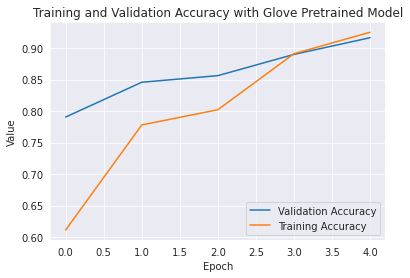

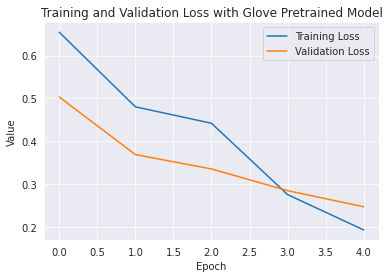

In [ ]:
import matplotlib.pyplot as plt

plt.clf()
plt.plot(hist_df['val_accuracy'], label='Validation Accuracy')
plt.plot(hist_df['accuracy'], label='Training Accuracy')
#plt.axvline(x = 4, linewidth=1, color='r', linestyle = "--")

plt.title('Training and Validation Accuracy with Glove Pretrained Model')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()


plt.plot(hist_df['loss'], label='Training Loss')
plt.plot(hist_df['val_loss'], label='Validation Loss')
#plt.axvline(x = 4, linewidth=1, color='r', linestyle = "--")

plt.title('Training and Validation Loss with Glove Pretrained Model')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

In [ ]:
predict_X=model2.predict(X_test) 
y_pred=np.argmax(predict_X,axis=1)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92       904
           1       0.90      0.93      0.92       906

    accuracy                           0.92      1810
   macro avg       0.92      0.92      0.92      1810
weighted avg       0.92      0.92      0.92      1810



In [ ]:
y_score = model2.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


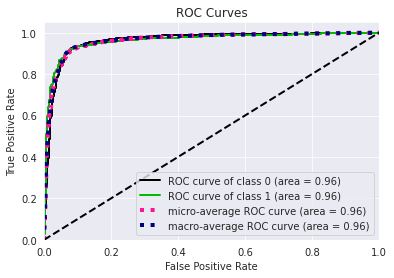

In [ ]:
import scikitplot as skplt
import matplotlib.pyplot as plt
skplt.metrics.plot_roc_curve(y_test, y_score)
plt.show()

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

accuracy:   0.917
Confusion matrix, without normalization


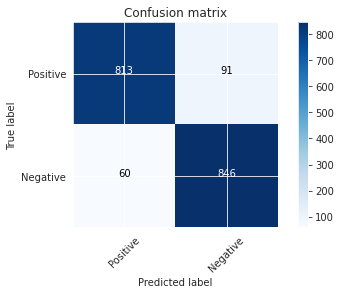

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import metrics
import itertools
score = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['Positive', 'Negative'])